In [1]:
import pandas as pd
mcdonalds = pd.read_csv('mcdonalds.csv')  

# Exploring Data

In [2]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [3]:
# Get the dimensions
num_rows, num_columns = mcdonalds.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 1453
Number of columns: 15


In [4]:
# Display the first 3 rows
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [5]:
# Selected columns 1 to 11 and convert to binary matrix
MD_x = mcdonalds.iloc[:, 0:11].apply(lambda x: (x == "Yes").astype(int))
# Calculating the column means and round to 2 decimal places
column_means = MD_x.mean().round(2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [6]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
# Print summary
explained_variance = pca.explained_variance_ratio_
print("Summary:")
print(f"Standard Deviation: {pca.singular_values_}")
print(f"Proportion of Variance Explained: {explained_variance}")
print(f"Cumulative Proportion: {explained_variance.cumsum()}")

Summary:
Standard Deviation: [28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]
Proportion of Variance Explained: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Proportion: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [7]:
import numpy as np
# Print PCA results with a specific number of digits
np.set_printoptions(precision=1)
print(MD_pca)


[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


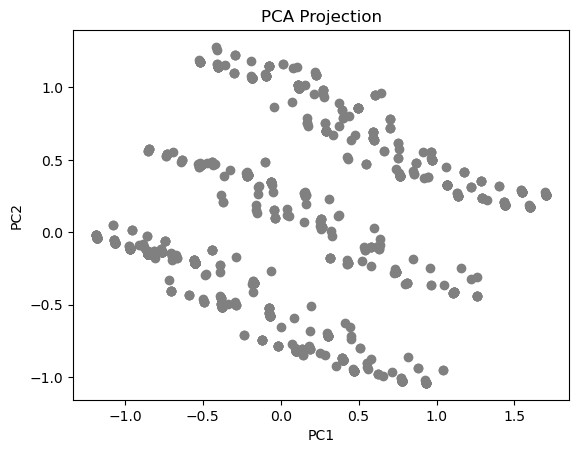

In [8]:
import matplotlib.pyplot as plt
# Extract the first two principal components
pc1 = MD_pca[:, 0]
pc2 = MD_pca[:, 1]
# Create a scatter plot
plt.scatter(pc1, pc2, c='grey', marker='o')
# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
# Show the plot
plt.show()

# Extracting Segments

# 1. Using k-Means

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Define the columns to be encoded
obj_columns = ['yummy', 'convenient', 'spicy', 'fattening', 
               'greasy', 'fast', 'cheap', 'tasty', 'expensive', 
               'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']

# Encode categorical columns using LabelEncoder
le = LabelEncoder()
for i in obj_columns:
    mcdonalds[i] = le.fit_transform(mcdonalds[i])

# Initialize lists to store cluster inertia and silhouette scores
n_clusters = [2, 3, 4, 5, 6, 7, 8]
clusters_inertia = []
s_scores = []

# Perform K-means clustering for different numbers of clusters
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42).fit(mcdonalds)
    
    # Calculate and store the inertia and silhouette score
    clusters_inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(mcdonalds, kmeans.labels_)
    s_scores.append(silhouette_avg)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


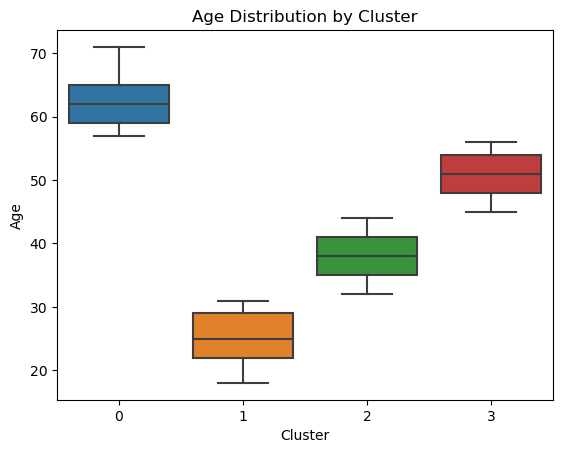

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, init="k-means++")
kmeans.fit(mcdonalds)

# Add cluster labels to the DataFrame
mcdonalds['Clusters'] = kmeans.labels_

# Create a boxplot to visualize 'Age' distribution within each cluster
sns.boxplot(x='Clusters', y='Age', data=mcdonalds)
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.title("Age Distribution by Cluster")
plt.show()

# 2.Using Mixtures of Distributions

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

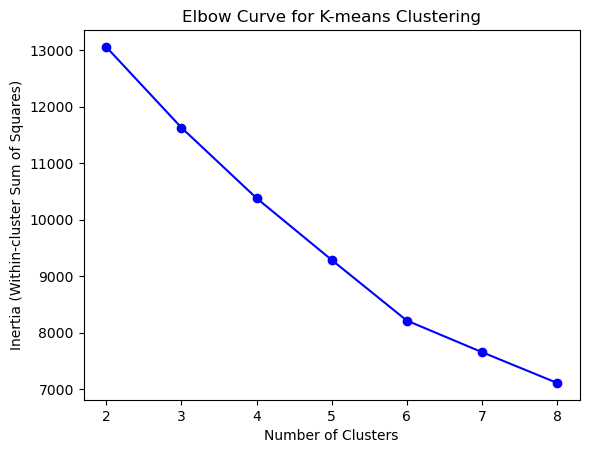

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Assuming 'mcdonalds' is your Pandas DataFrame

# Select the relevant binary attributes for modeling
X = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering for a range of cluster numbers (2 to 8)
cluster_numbers = range(2, 9)
inertia_values = []

for n_clusters in cluster_numbers:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal number of clusters
plt.plot(cluster_numbers, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Curve for K-means Clustering')
plt.show()

# Based on the elbow curve, you can choose the optimal number of clusters
optimal_n_clusters = 4  # Replace with the chosen number of clusters

# Perform finite mixture modeling for binary data
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=1234)
gmm.fit(X_scaled)

# Get cluster labels for each data point
gmm_labels = gmm.predict(X_scaled)

# Create a DataFrame to store cluster labels from the finite mixture model
cluster_df = pd.DataFrame({'GMM_Clusters': gmm_labels})


# 3.Using Mixtures of Regression Models

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


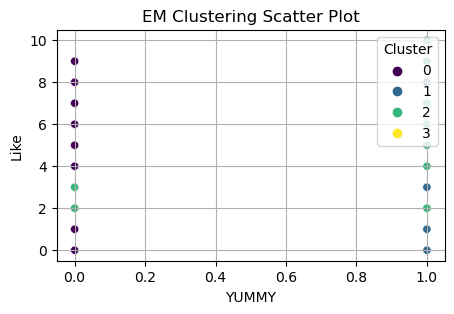

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

# Assuming 'mcdonalds' is your Pandas DataFrame
# Select the relevant binary attributes for clustering
X = mcdonalds[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]

# Fit a Gaussian Mixture Model (EM clustering) with a specified number of components
n_components = 4  # Adjust the number of components as needed
gmm = GaussianMixture(n_components=n_components, random_state=42)
cluster_labels = gmm.fit_predict(X)

# Add cluster labels to the DataFrame
mcdonalds['Cluster'] = cluster_labels

# Create a scatter plot
plt.figure(figsize=(5, 3))
sns.scatterplot(x='yummy', y='Like', hue='Cluster', data=mcdonalds, palette='viridis')
plt.title('EM Clustering Scatter Plot')
plt.xlabel('YUMMY')
plt.ylabel('Like')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()


#  Profiling Segments

In [43]:
import pandas as pd

# Group the data by cluster and calculate the mean of each attribute
segment_profiles = mcdonalds.groupby('Clusters').mean()

# Display the segment profiles
print(segment_profiles)


             yummy  convenient     spicy  fattening    greasy      fast  \
Clusters                                                                  
0         0.423181    0.876011  0.172507   0.816712  0.431267  0.897574   
1         0.778116    0.936170  0.051672   0.933131  0.735562  0.933131   
2         0.617801    0.908377  0.052356   0.876963  0.518325  0.866492   
3         0.415094    0.913747  0.094340   0.849057  0.444744  0.908356   

             cheap     tasty  expensive   healthy  disgusting      Like  \
Clusters                                                                  
0         0.649596  0.557951   0.266846  0.207547    0.231806  4.964960   
1         0.626140  0.802432   0.349544  0.164134    0.197568  4.404255   
2         0.541885  0.667539   0.426702  0.230366    0.261780  4.594241   
3         0.582210  0.566038   0.385445  0.188679    0.274933  4.557951   

                Age  VisitFrequency    Gender   Cluster  
Clusters                                

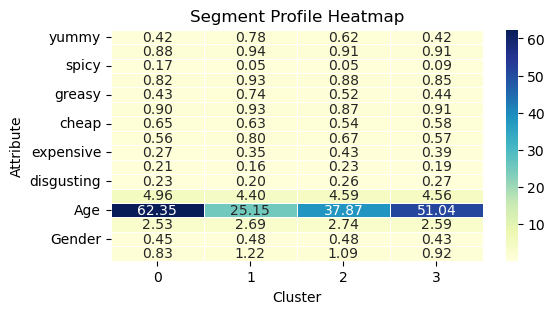

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap
plt.figure(figsize=(6,3))
sns.heatmap(segment_profiles.T, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Segment Profile Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Attribute')
plt.xticks(rotation=0)
plt.show()


<Figure size 400x300 with 0 Axes>

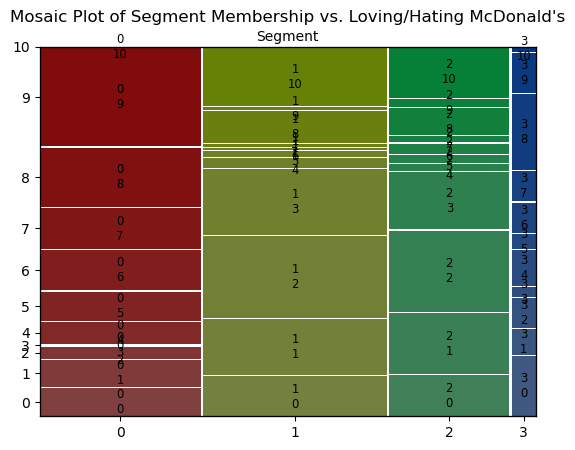

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Assuming 'mcdonalds' is your Pandas DataFrame with cluster labels
# Create a cross-tabulation between Cluster and Loving/Hating McDonald's
cross_tab = pd.crosstab(mcdonalds['Cluster'], mcdonalds['Like'])

# Create a mosaic plot
plt.figure(figsize=(4, 3))
mosaic(cross_tab.stack(), title='Mosaic Plot of Segment Membership vs. Loving/Hating McDonald\'s')
plt.xlabel('Segment')
plt.ylabel('Loving/Hating McDonald\'s')
plt.show()


# Selecting (the) Target Segment(s)

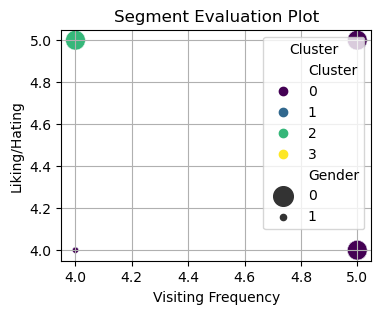

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'mcdonalds' is your Pandas DataFrame with cluster labels and attributes


# Define your "knock-out criteria" and "segment attractiveness criteria" as filters
# Example: Include segments where VisitFrequency > 3 and Like is between 4 and 5
knockout_criteria = (mcdonalds['VisitFrequency'] > 3) & (mcdonalds['Like'] >= 4) & (mcdonalds['Like'] <= 5)

# Apply the criteria to filter the segments of interest
selected_segments = mcdonalds[knockout_criteria]

# Create the segment evaluation plot
plt.figure(figsize=(4, 3))
sns.scatterplot(
    x='VisitFrequency', y='Like', hue='Cluster', size='Gender', data=selected_segments,
    palette='viridis', sizes=(20, 200)
)
plt.title('Segment Evaluation Plot')
plt.xlabel('Visiting Frequency')
plt.ylabel('Liking/Hating')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)

# Show the plot
plt.show()


# Customising the Marketing Mix

In [67]:
# Assume you have identified Segment 3 as the target segment
target_segment = mcdonalds[mcdonalds['Cluster'] == 3]

# Design the MCSUPERBUDGET product line for Segment 3
def design_mcsuperbudget(product_features, price):
    # Adjust product features based on segment preferences
    # Here, we'll just simplify it as adding "Budget" to the product name
    product_name = f"MCSUPERBUDGET {product_features}"
    
    # Adjust the pricing strategy for budget-conscious customers
    adjusted_price = price * 0.8  # Reduce the price by 20%
    
    return product_name, adjusted_price

# Example: Design a budget-friendly burger for Segment 3
product_name, adjusted_price = design_mcsuperbudget("Deluxe Burger", 5.99)

# Print the designed product and pricing
print("Designed Product:", product_name)
print("Adjusted Price: $", adjusted_price)


Designed Product: MCSUPERBUDGET Deluxe Burger
Adjusted Price: $ 4.792000000000001
